The problem statement for Assignment 4 is:

Download the leaning tower of the PISA image and find the angle of inclination using appropriate rotations with bilinear interpolation.
Kindly note the rotation has to be performed using both user defined and predefined functions.

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

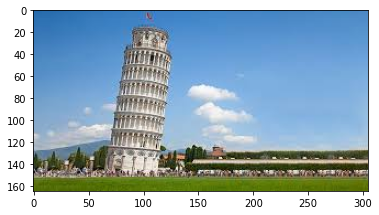

In [20]:
#Rotate image using bilinear interpolation
pisa=cv2.imread('PISA.jpg')
pisa=cv2.cvtColor(pisa,cv2.COLOR_BGR2RGB)
plt.imshow(pisa)
plt.show()

Using inbuilt functions:

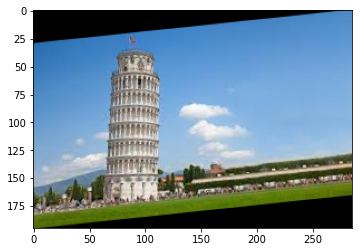

In [21]:
def rotate_u(image,angle):
    (h,w)=image.shape[:2]
    center=(w//2,h//2)
    M=cv2.getRotationMatrix2D(center,angle,1.0)
    cos=np.abs(M[0,0])
    sin=np.abs(M[0,1])

    nw=int(-(h*sin)+(w*cos))
    nH=int((h*cos)+(w*sin))

    M[0,2]+=nw//2-center[0]
    M[1,2]+=nH//2-center[1]
    rotated=cv2.warpAffine(image,M,(nw,nH))
    return rotated

rotatedpre=rotate_u(pisa,6)
plt.imshow(rotatedpre)
plt.show()


Using user defined functions:

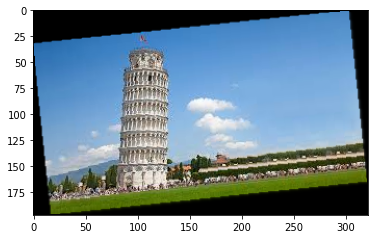

In [22]:
import numpy as np
import cv2
import math


image = cv2.imread("PISA.jpg")           
angle = 6              
r_angle=angle

angle=math.radians(angle)                          
cosine=math.cos(angle)
sine=math.sin(angle)

height=image.shape[0]                                 
width=image.shape[1]        

new_height  = round(abs(image.shape[0]*cosine)+abs(image.shape[1]*sine))+1
new_width  = round(abs(image.shape[1]*cosine)+abs(image.shape[0]*sine))+1

output=np.zeros((new_height,new_width,image.shape[2]))

original_centre_height   = round(((image.shape[0]+1)/2)-1)    
original_centre_width    = round(((image.shape[1]+1)/2)-1) 

new_centre_height= round(((new_height+1)/2)-1)       
new_centre_width= round(((new_width+1)/2)-1)    

for i in range(height):
    for j in range(width):

        y=image.shape[0]-1-i-original_centre_height                   
        x=image.shape[1]-1-j-original_centre_width                      
        
        new_y=round(-x*sine+y*cosine)
        new_x=round(x*cosine+y*sine)

        new_y=new_centre_height-new_y
        new_x=new_centre_width-new_x

        if 0 <= new_x < new_width and 0 <= new_y < new_height and new_x>=0 and new_y>=0:
            output[new_y,new_x,:]=image[i,j,:]                         

img=output
height,width,c=img.shape

for i in range(width):
    for j in range(height):
        if img[j,i,0]==0 and img[j,i,1]==0 and img[j,i,2]==0:
            if j<height -1 and i<width -1 and j>1 and i>1:
                img[j,i,0]=(img[j+1,i,0]+img[j-1,i,0]+img[j,i+1,0]+img[j,i-1,0])/4
                img[j,i,1]=(img[j+1,i,1]+img[j-1,i,1]+img[j,i+1,1]+img[j,i-1,1])/4
                img[j,i,2]=(img[j+1,i,2]+img[j-1,i,2]+img[j,i+1,2]+img[j,i-1,2])/4

cv2.imwrite("output_rotated_"+str(r_angle)+".png",img)
rotated=plt.imread('output_rotated_'+str(r_angle)+'.png')
plt.imshow(rotated)
plt.show()


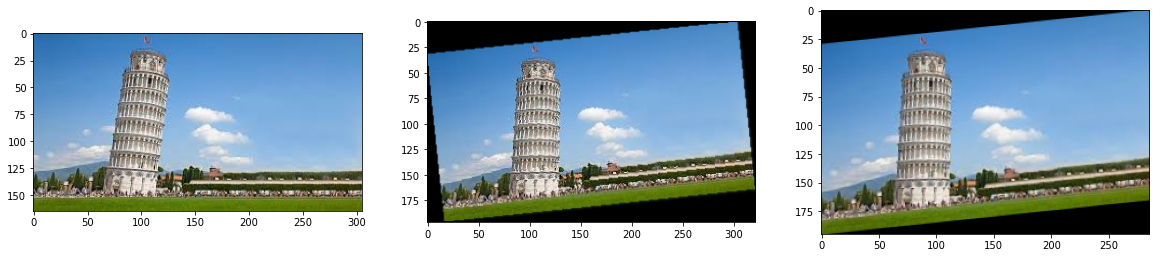

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=3 ,figsize=(20,20))
axes[0].imshow(pisa)
axes[1].imshow(rotated)
axes[2].imshow(rotatedpre)
plt.show()
